In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'wstetheth_trades_arb_indicator.csv'
data = pd.read_csv(file_path)

# Convert block_time to datetime and extract hour
data['block_time'] = pd.to_datetime(data['block_time'], format='%Y-%m-%d %H:%M:%S.%f UTC')
data['hour'] = data['block_time'].dt.hour
data['minute'] = data['block_time'].dt.minute
# data=data.loc[data.hour==12]

# Define a function to categorize trades into buying and selling
def categorize_trade(row):
    if row['token_bought_symbol'] == 'wstETH':
        return 'buy'
    elif row['token_sold_symbol'] == 'wstETH':
        return 'sell'
    return None

# Apply the function to categorize trades
data['trade_type'] = data.apply(categorize_trade, axis=1)

# Filter out rows where trade_type is None
data = data.dropna(subset=['trade_type'])


In [2]:
data.loc[:].groupby(['address']).count().sort_values('blockchain')

,blockchain,project,version,block_month,block_date,block_time,block_number,token_bought_symbol,token_sold_symbol,token_pair,...,maker,project_contract_address,tx_hash,tx_from,tx_to,evt_index,indicator,hour,minute,trade_type
address,,,,,,,,,,,,,,,,,,,,,
0x7a250d5630b4cf539739df2c5dacb4c659f2488d,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
0xdb5889e35e379ef0498aae126fc2cce1fbd23216,3,3,3,3,3,3,3,3,3,3,...,0,3,3,3,3,3,3,3,3,3
0x03f34be1bf910116595db1b11e9d1b2ca5d59659,4,4,4,4,4,4,4,4,4,4,...,0,4,4,4,4,4,4,4,4,4
0x58df81babdf15276e761808e872a3838cbecbcf9,5,5,5,5,5,5,5,5,5,5,...,0,5,5,5,5,5,5,5,5,5
0x3999d2c5207c06bbc5cf8a6bea52966cabb76d41,6,6,6,6,6,6,6,6,6,6,...,0,6,6,6,6,6,6,6,6,6
0x80a64c6d7f12c47b7c66c5b4e20e72bc1fcd5d9e,7,7,7,7,7,7,7,7,7,7,...,0,7,7,7,7,7,7,7,7,7
0x1291c02d288de3de7dc25353459489073d11e1ae,10,10,10,10,10,10,10,10,10,10,...,0,10,10,10,10,10,10,10,10,10
0x50f9bde1c76bba997a5d6e7fefff695ec8536194,10,10,10,10,10,10,10,10,10,10,...,0,10,10,10,10,10,10,10,10,10
0x00000000009726632680fb29d3f7a9734e3010e2,17,17,17,17,17,17,17,17,17,17,...,0,17,17,17,17,17,17,17,17,17


In [3]:
N=10
data2=data.copy()
arbadd=data2.loc[:].groupby(['address']).count().sort_values('blockchain').tail(N).index.values

In [4]:
data['indicator2']=data.address.isin(arbadd)

In [5]:
len(arbadd)

10

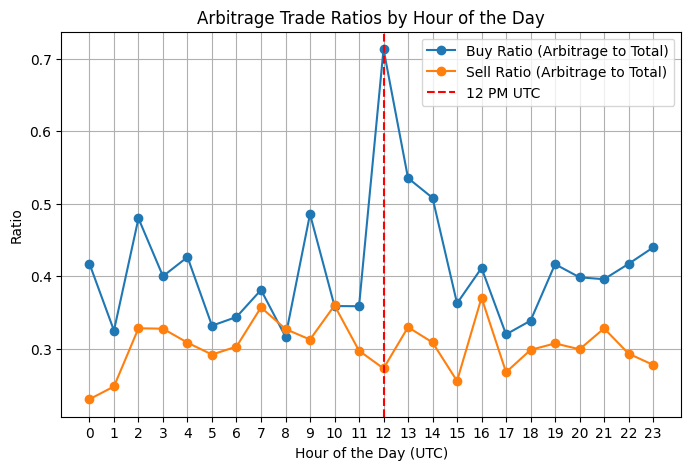

In [6]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'wstetheth_trades_arb_indicator.csv'
data = pd.read_csv(file_path)

# Convert block_time to datetime and extract hour
data['block_time'] = pd.to_datetime(data['block_time'], format='%Y-%m-%d %H:%M:%S.%f UTC')
data['hour'] = data['block_time'].dt.hour

# Define a function to categorize trades into buying and selling
def categorize_trade(row):
    if row['token_bought_symbol'] == 'wstETH':
        return 'buy'
    elif row['token_sold_symbol'] == 'wstETH':
        return 'sell'
    return None

# Apply the function to categorize trades
data['trade_type'] = data.apply(categorize_trade, axis=1)

# Filter out rows where trade_type is None
data = data.dropna(subset=['trade_type'])


data['indicator']=data.address.isin(arbadd)

# Aggregate the data by hour, trade_type, and indicator
agg_data = data.groupby(['hour', 'trade_type', 'indicator'])['amount_usd'].sum().unstack(fill_value=0)

# Calculate the ratios
buy_ratio = agg_data.loc[(slice(None), 'buy'), True] / (agg_data.loc[(slice(None), 'buy'), True] + agg_data.loc[(slice(None), 'buy'), False])
sell_ratio = agg_data.loc[(slice(None), 'sell'), True] / (agg_data.loc[(slice(None), 'sell'), True] + agg_data.loc[(slice(None), 'sell'), False])



# # Calculate the ratios
# buy_arb = agg_data.loc[(slice(None), 'buy'), 'Arbitrage'] 
# sell_arb = agg_data.loc[(slice(None), 'sell'), 'Arbitrage'] 
# buy_nonarb = agg_data.loc[(slice(None), 'buy'), 'Non-arbitrage'] 
# sell_nonarb = agg_data.loc[(slice(None), 'sell'), 'Non-arbitrage'] 



# Plot the ratios
plt.figure(figsize=(8, 5))
plt.plot(buy_ratio.index.get_level_values(0), buy_ratio, label='Buy Ratio (Arbitrage to Total)', marker='o')
plt.plot(sell_ratio.index.get_level_values(0), sell_ratio, label='Sell Ratio (Arbitrage to Total)', marker='o')
plt.axvline(x=12, color='r', linestyle='--', label='12 PM UTC')
plt.xlabel('Hour of the Day (UTC)')
plt.ylabel('Ratio')
plt.title('Arbitrage Trade Ratios by Hour of the Day')
plt.legend()
plt.grid(True)
plt.xticks(range(24))
plt.savefig('arbitrage_trade_ratios_by_hour.png')  # Save the figure

plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'wstetheth_trades_arb_indicator.csv'
data = pd.read_csv(file_path)

# Convert block_time to datetime and extract hour
data['block_time'] = pd.to_datetime(data['block_time'], format='%Y-%m-%d %H:%M:%S.%f UTC')
data['hour'] = data['block_time'].dt.hour

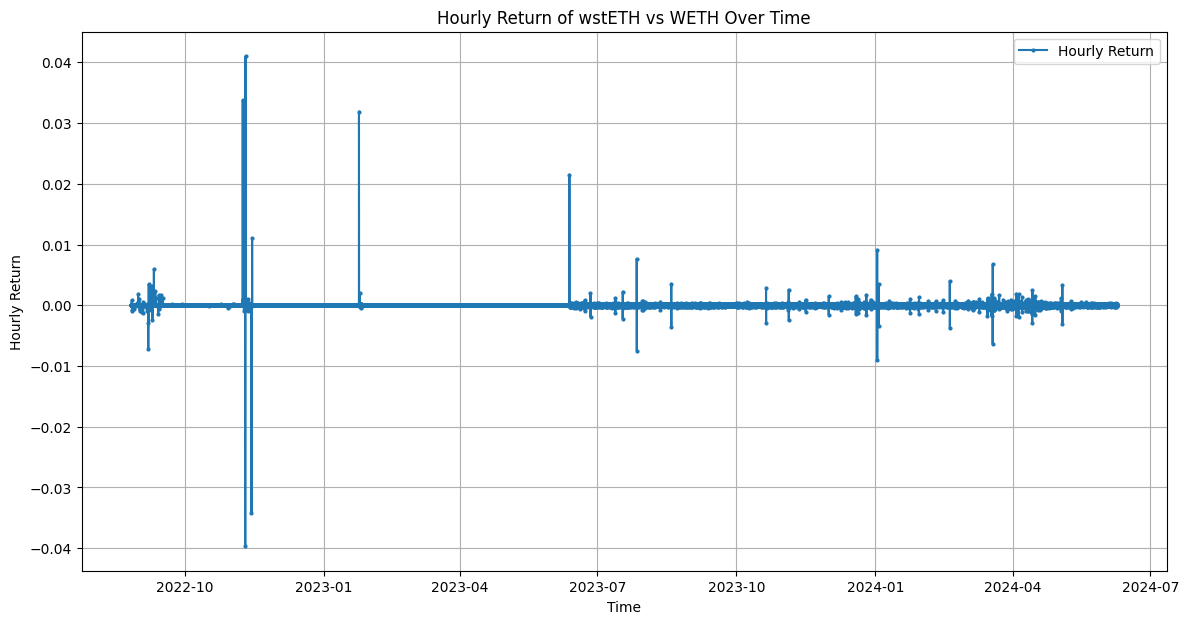

In [8]:
data=data.loc[data.token_sold_amount!=0]

# Calculate the price of wstETH in terms of WETH for each trade
def calculate_price(row):
    if row['token_bought_symbol'] == 'wstETH' and row['token_sold_symbol'] == 'WETH':
        return row['token_sold_amount'] / row['token_bought_amount']
    elif row['token_bought_symbol'] == 'WETH' and row['token_sold_symbol'] == 'wstETH':
        return row['token_bought_amount'] / row['token_sold_amount']
    return None

data['price'] = data.apply(calculate_price, axis=1)

# Drop rows where price could not be calculated
data = data.dropna(subset=['price'])


# Ensure the datetime column is set as index
data.set_index('block_time', inplace=True)

# Resample to hourly frequency, taking the first and last price in each hour
hourly_prices = data['price'].resample('H').agg(['first', 'last'])

# Calculate the hourly returns based on the first and last price
hourly_prices['hourly_return'] = hourly_prices['last'].pct_change()

# Reset index to get 'block_time' back as a column
data.reset_index(inplace=True)

# Plot the hourly returns
plt.figure(figsize=(14, 7))
plt.plot(hourly_prices.index, hourly_prices['hourly_return'], label='Hourly Return', marker='o', linestyle='-', markersize=2)
plt.xlabel('Time')
plt.ylabel('Hourly Return')
plt.title('Hourly Return of wstETH vs WETH Over Time')
plt.legend()
plt.grid(True)
# plt.savefig('arbitrage_trade_ratios_by_hour.png')  # Save the figure

plt.show()

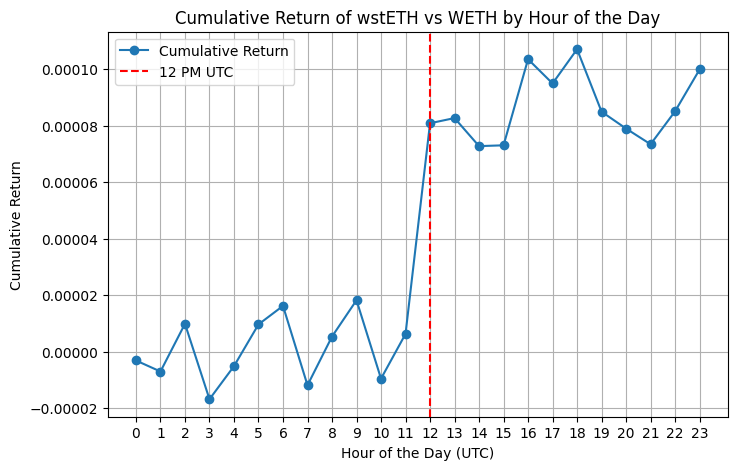

In [9]:
# Compute the hourly returns
# data['hourly_return'] = data.groupby(data['block_time'].dt.hour)['price'].pct_change()
# data['hourly_return'] = data['hourly_return'].fillna(0)
hourly_prices['hour']=hourly_prices.index.hour
# Aggregate the returns by hour
hourly_returns = hourly_prices.loc['2023-07-01':].groupby(hourly_prices['hour'])['hourly_return'].mean()

# Calculate the cumulative returns
cumulative_returns = (1 + hourly_returns).cumprod() - 1

# Plot the cumulative returns by hour of the day
plt.figure(figsize=(8, 5))
plt.plot(cumulative_returns.index, cumulative_returns, label='Cumulative Return', marker='o')
plt.axvline(x=12, color='r', linestyle='--', label='12 PM UTC')
plt.xlabel('Hour of the Day (UTC)')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return of wstETH vs WETH by Hour of the Day')
plt.legend()
plt.grid(True)
plt.xticks(range(24))
plt.savefig('wstETH_price_by_hour.png')  # Save the figure
plt.show()

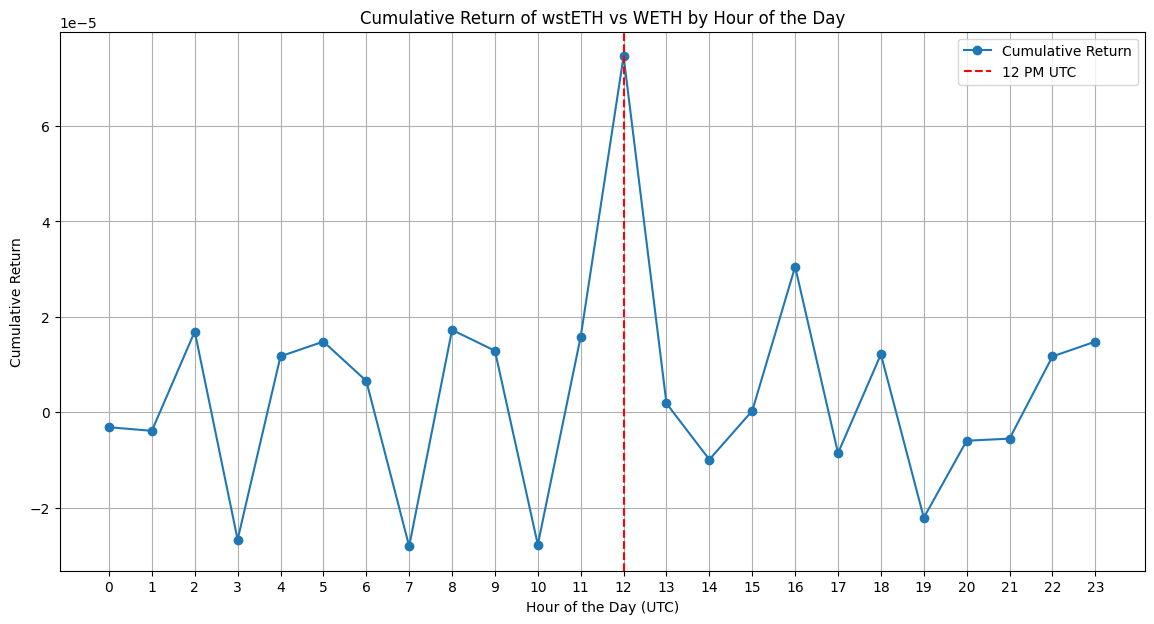

In [10]:

# Plot the cumulative returns by hour of the day
plt.figure(figsize=(14, 7))
plt.plot(hourly_returns.index, hourly_returns, label='Cumulative Return', marker='o')
plt.axvline(x=12, color='r', linestyle='--', label='12 PM UTC')
plt.xlabel('Hour of the Day (UTC)')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return of wstETH vs WETH by Hour of the Day')
plt.legend()
plt.grid(True)
plt.xticks(range(24))
plt.show()

In [11]:
hourly_returns

hour
0    -3.159516e-06
1    -3.908909e-06
2     1.690933e-05
3    -2.672302e-05
4     1.171491e-05
5     1.479746e-05
6     6.550588e-06
7    -2.811109e-05
8     1.724388e-05
9     1.288290e-05
10   -2.779169e-05
11    1.584651e-05
12    7.464403e-05
13    1.831515e-06
14   -9.936970e-06
15    2.847822e-07
16    3.050169e-05
17   -8.594989e-06
18    1.213473e-05
19   -2.213068e-05
20   -5.985255e-06
21   -5.551114e-06
22    1.168898e-05
23    1.479883e-05
Name: hourly_return, dtype: float64